Type your password and press enter:strong@arms123
Email Sent Successfully!


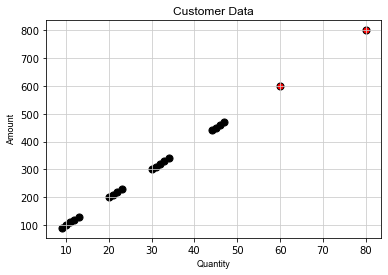

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import smtplib, ssl
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
%matplotlib inline

sender_email = "danarms.2421@gmail.com"
receiver_emails = ["danarms.2421@gmail.com", "falbar.2421@gmail.com"]
password = input("Type your password and press enter:")

message = MIMEMultipart("alternative")
message["Subject"] = "Data Anomaly Report"
message["From"] = sender_email
message["To"] = ", ".join(receiver_emails)

data = [['AAA',9,90],['BBB',10,100],['CCC',11,110],['DDD',12,120],['EEE',13,130],['FFF',20,200], ['GGG',21,210],['HHH',22,220],['III',23,230],['JJJ',80,800],['KKK',60,600],['LLL',30,300],['MMM',31,310],['NNN',32,320],['OOO',33,330],['PPP',34,340], ['QQQ',44,440],['RRR',45,450],['SSS',46,460],['TTT',47,470]]
df = pd.DataFrame(data,columns=['Name','Quantity','Amount'])
dfhtml1 = df.to_html(index = False)

dbscan_data = df[['Quantity','Amount']]
dbscan_data = dbscan_data.values.astype('int64', copy=False)
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
model = DBSCAN(eps=1, min_samples=5, metric='euclidean').fit(dbscan_data)
outlier_df = df[model.labels_==-1]
cluster_df = df[model.labels_!=-1]

variance_data = pd.DataFrame(outlier_df,columns=['Name','Quantity','Amount'])
dfhtml2 = variance_data.to_html(index = False)

colors_clusters = 'black'
colors_outlier = 'red'

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(cluster_df['Quantity'], cluster_df['Amount'], c=colors_clusters, edgecolors='black', s=50)
ax.scatter(outlier_df['Quantity'], outlier_df['Amount'], c=colors_outlier, edgecolors='black', s=50)
ax.set_xlabel('Quantity', family='Arial', fontsize=9)
ax.set_ylabel('Amount', family='Arial', fontsize=9)
plt.title('Customer Data', family='Arial', fontsize=12)
plt.grid(which='major',color='#cccccc')
plt.savefig('variance_chart.png', dpi=100)
attachment = 'variance_chart.png'

fp = open(attachment, 'rb')
img = MIMEImage(fp.read())
fp.close()
img.add_header('Content-ID', '<{}>'.format(attachment))

html = """\
    <html>
      <head><style>
      table, th, td {{ border: 1px solid black; border-collapse: collapse; }}
      th, td {{ padding: 5px; }}
    </style></head>
      <body>
        <p>Hi!
            <br>Hope your are doing well</p>
        <p><br><b>
           Sales Data:<br>
           {0}
        <br><b>Variance Report:<br>
           {1}
        <br><b>Number of Outliers Found using DBSCAN CLUSTERING: {2}
        </p>
        <p><br>
         <p><img src="cid:variance_chart.png" alt="Variance Chart"></p>
        </p>
      </body>
    </html>""".format(df.to_html(), variance_data.to_html(), len(df[model.labels_==-1]))


msg = MIMEText(html, "html")
message.attach(msg)
message.attach(img)
context = ssl.create_default_context()

try:
    with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_emails, message.as_string())
        print ("Email Sent Successfully!")
except SMTPException:
    print ("Error: Unable to Send Email.")